## Statistics and Optimization TABA - Part 3

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error
import numpy as np

In [41]:
data = pd.read_csv("C:\\Users\\Asus\\OneDrive\\Desktop\\Stats_TABA\\time-series.csv")

print("Dataset Information:\n")
data.info()
print("\nFirst few rows:\n")
print(data.head())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      24000 non-null  object 
 1   V2      24000 non-null  float64
 2   V3      24000 non-null  float64
 3   V4      24000 non-null  float64
 4   V5      24000 non-null  float64
 5   V6      24000 non-null  float64
 6   V7      24000 non-null  float64
 7   V8      24000 non-null  float64
 8   V9      24000 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.6+ MB

First few rows:

   V1           V2           V3           V4           V5           V6  \
0  Q1  6790.643698  6598.952202  6608.527173  6765.914014  6992.949003   
1  Q2  7081.709669  6789.414723  6895.838545  7050.508939  7155.206969   
2  Q3  7188.893596  6986.330400  7025.162033  7066.270724  7129.545542   
3  Q4  7679.102564  7483.094657  7510.212380  7600.148193  7714.398010   
4  Q5  1150.000000   99

In [42]:
data['Quarter'] = data['V1']
data['Target'] = data['V3']
data['Quarter_Index'] = range(1, len(data) + 1)

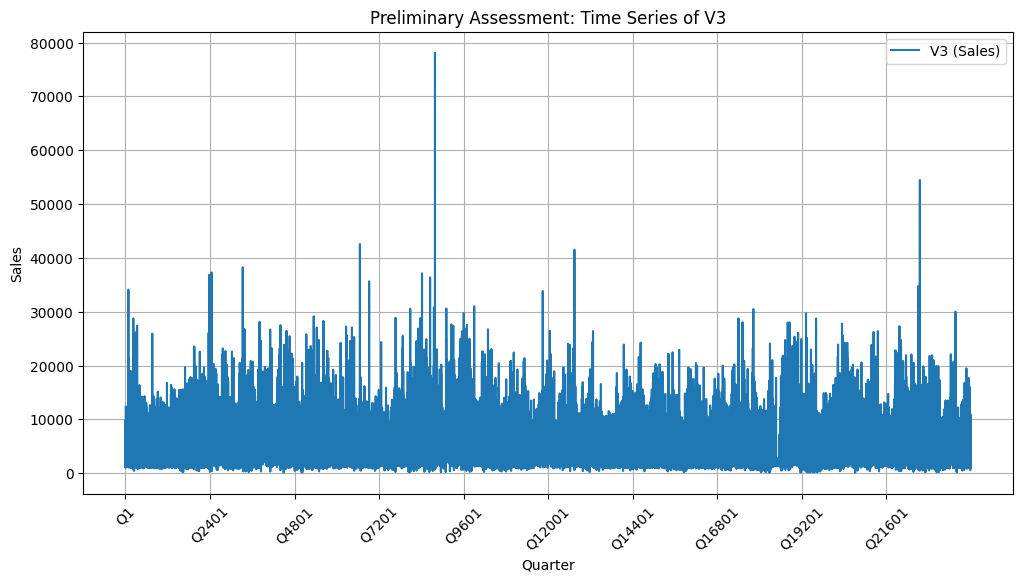

In [43]:
plt.figure(figsize=(12, 6))
plt.plot(data['Quarter'], data['Target'], label='V3 (Sales)')
plt.title('Preliminary Assessment: Time Series of V3')
plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.xticks(ticks=range(0, len(data), len(data)//10), labels=data['Quarter'][::len(data)//10], rotation=45)
plt.legend()
plt.grid()
plt.show()

In [44]:
data.dtypes

V1                object
V2               float64
V3               float64
V4               float64
V5               float64
V6               float64
V7               float64
V8               float64
V9               float64
Quarter           object
Target           float64
Quarter_Index      int64
dtype: object

In [45]:
# Check for missing values
print("Missing values in the dataset:\n")
print(data.isnull().sum())

Missing values in the dataset:

V1               0
V2               0
V3               0
V4               0
V5               0
V6               0
V7               0
V8               0
V9               0
Quarter          0
Target           0
Quarter_Index    0
dtype: int64


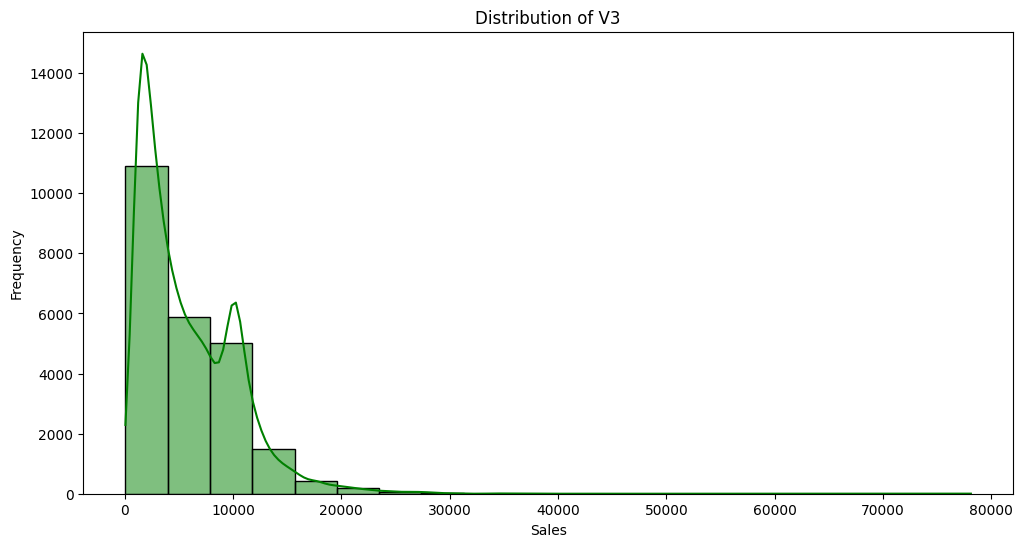

In [46]:
variable= 'V3'
time_series=data[variable]
# Distribution of sales
plt.figure(figsize=(12, 6))
sns.histplot(time_series.dropna(), kde=True, bins=20, color='green')
plt.title(f"Distribution of {variable}")
plt.xlabel("Sales")
plt.ylabel("Frequency")
plt.show()

count    24000.000000
mean      5863.121355
std       4546.770194
min         72.800000
25%       2167.900024
50%       4557.702970
75%       9050.000000
max      78103.000000
Name: V3, dtype: float64


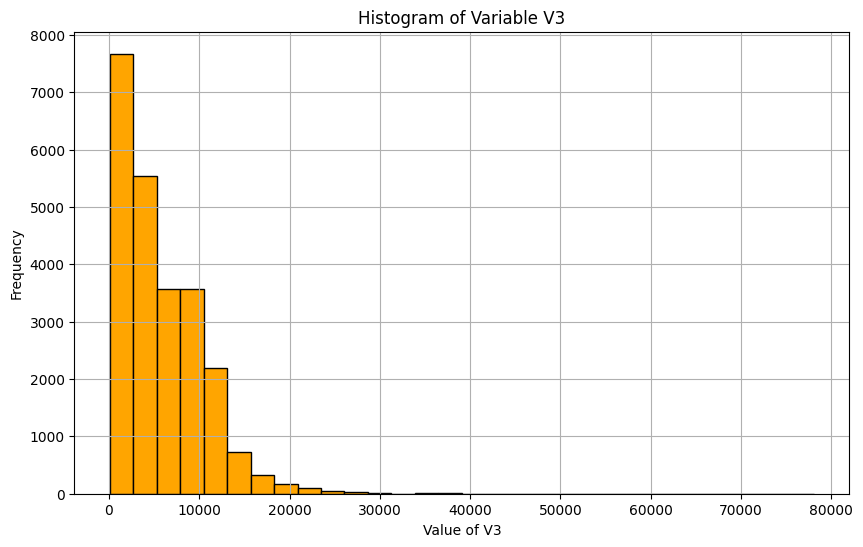

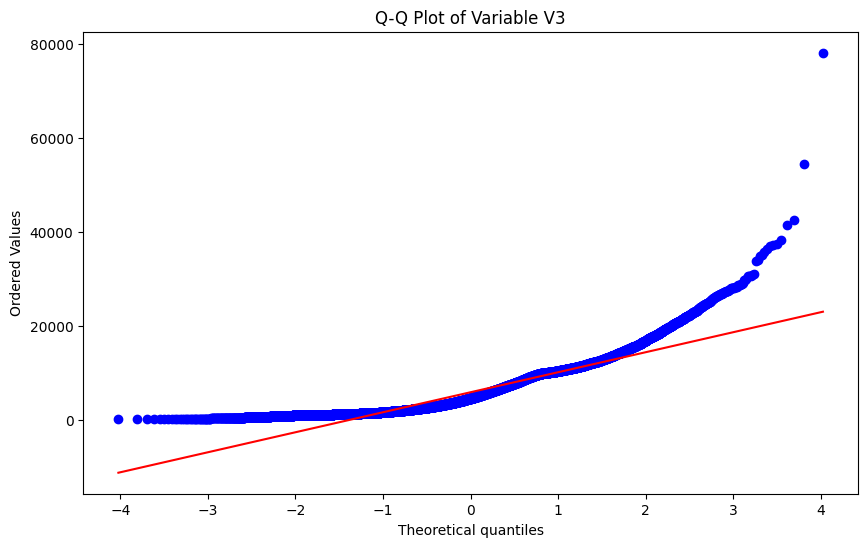

Shapiro-Wilk test statistic: 0.8775734349730997, p-value: 2.2978629880701606e-85


c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 24000.
  res = hypotest_fun_out(*samples, **kwds)


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Summary statistics
summary_stats = data['V3'].describe()
print(summary_stats)

# Histogram
plt.figure(figsize=(10, 6))
data['V3'].hist(bins=30, color='orange', edgecolor='black')
plt.title('Histogram of Variable V3')
plt.xlabel('Value of V3')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(data['V3'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Variable V3')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(data['V3'])
print(f'Shapiro-Wilk test statistic: {shapiro_test[0]}, p-value: {shapiro_test[1]}')


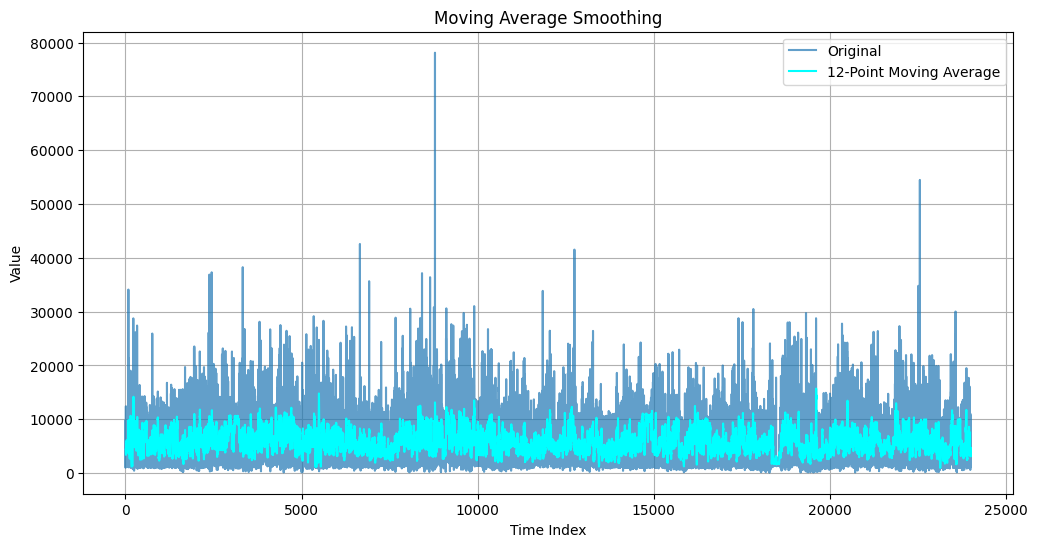

In [48]:
# Moving average is used to smooth the series and highlight trends.
data['Moving_Avg'] = data['V3'].rolling(window=12).mean()

# Plot original and smoothed data
plt.figure(figsize=(12, 6))
plt.plot(data['V3'], label='Original', alpha=0.7)
plt.plot(data['Moving_Avg'], label='12-Point Moving Average', color='cyan')
plt.title('Moving Average Smoothing') 
plt.xlabel('Time Index') 
plt.ylabel('Value') 
plt.legend() 
plt.grid() 
plt.show()

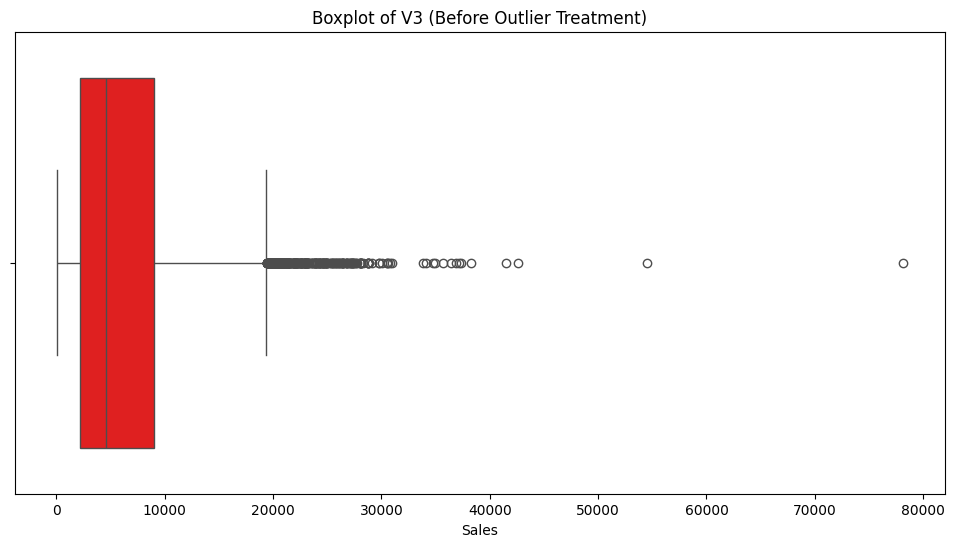

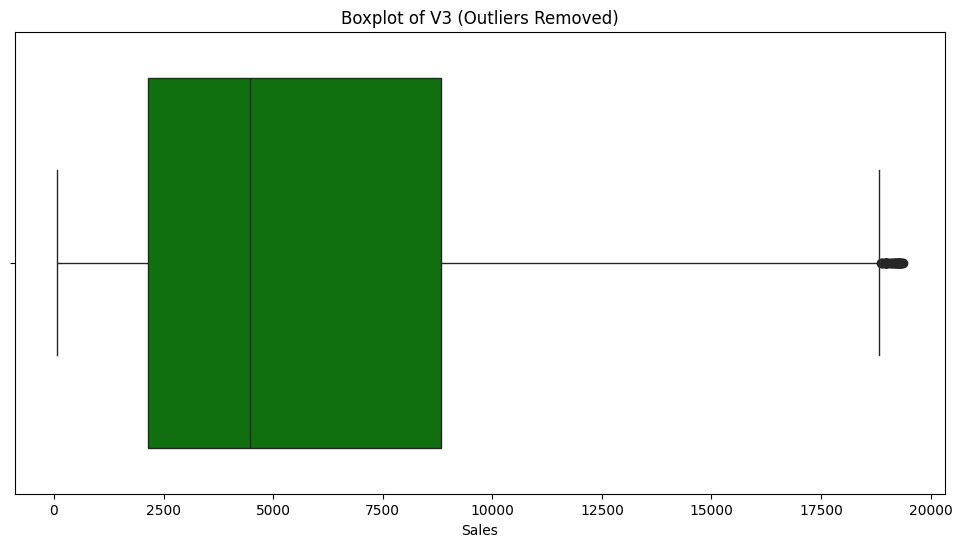

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming time_series is a pandas Series
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = time_series.quantile(0.25)
Q3 = time_series.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Boxplot before outlier treatment
plt.figure(figsize=(12, 6))
sns.boxplot(x=time_series, color='red')
plt.title(f"Boxplot of {variable} (Before Outlier Treatment)")
plt.xlabel("Sales")
plt.show()

# Remove outliers
time_series_no_outliers = time_series[(time_series >= lower_bound) & (time_series <= upper_bound)]

# Boxplot after outlier treatment
plt.figure(figsize=(12, 6))
sns.boxplot(x=time_series_no_outliers, color='green')
plt.title(f"Boxplot of {variable} (Outliers Removed)")
plt.xlabel("Sales")
plt.show()


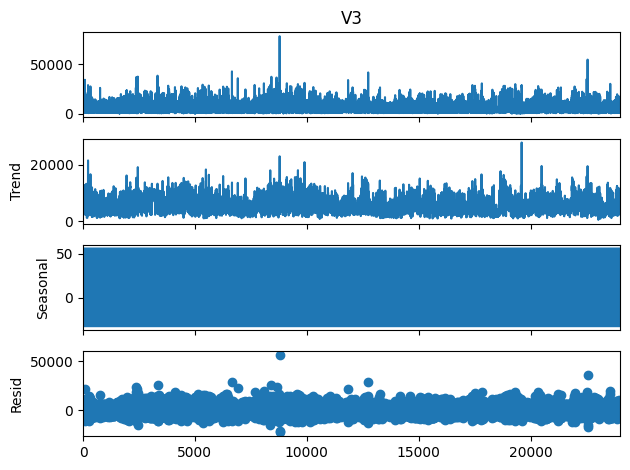

In [50]:
# Perform Seasonal Decomposition
result = seasonal_decompose(time_series, model='additive', period=4)
result.plot()
plt.show()

In [51]:
from statsmodels.tsa.stattools import adfuller

# ADF Test for stationarity
adf_test = adfuller(time_series.dropna())
print("ADF Test Results:")
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# Check if the data is stationary
if adf_test[1] <= 0.05:  # p-value threshold for stationarity
    print("Data is stationary.")
else:
    print("Data is not stationary.")


ADF Test Results:
ADF Statistic: -15.362434098721351
p-value: 3.5976161908024573e-28
Data is stationary.


In [52]:
import pandas as pd
from scipy.stats import boxcox


# Ensure all values in V3 are positive (Box-Cox only works on positive values)
if (data['V3'] <= 0).any():
    raise ValueError("Box-Cox transformation requires all values to be positive.")

# Apply Box-Cox transformation
data['V3'], lambda_param = boxcox(data['V3'])

# Print the lambda value used for the transformation
print(f"Lambda parameter used for Box-Cox transformation: {lambda_param}")


Lambda parameter used for Box-Cox transformation: 0.16130339399605845


In [53]:
# Step 2: Train-Test Split
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]
train_series = train.set_index('Quarter_Index')['Target']
test_series = test.set_index('Quarter_Index')['Target']

In [54]:
# Function to calculate additional metrics
def calculate_metrics(test, forecast):
    mse = mean_squared_error(test, forecast)
    rmse = np.sqrt(mse)
    r2 = r2_score(test, forecast)
    mape = mean_absolute_percentage_error(test, forecast)
    return mse, rmse, r2, mape

In [55]:
# Generate dynamic future quarters based on the last quarter in the dataset
def generate_future_quarters(last_quarter, n_future=4):
    future_quarters = []
    for i in range(1, n_future + 1):
        number = int(last_quarter[1:]) + i
        future_quarters.append(f"Q{number}")
    return future_quarters

In [56]:
# Naive Model
naive_forecast = [train_series.iloc[-1]] * len(test_series)  # Forecast the same value as the last value in the training set
naive_rmse = np.sqrt(mean_squared_error(test_series, naive_forecast))
naive_r2 = r2_score(test_series, naive_forecast)
naive_mape = mean_absolute_percentage_error(test_series, naive_forecast)


In [61]:
from pmdarima import auto_arima

auto_model = auto_arima(
    train_series,
    seasonal=False,
    stepwise=True,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    max_order=10
)



Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=376720.378, Time=9.66 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=387515.727, Time=0.50 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=382473.254, Time=1.25 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=376800.167, Time=13.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=387513.727, Time=0.48 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=376588.130, Time=44.93 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=376675.693, Time=17.58 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=376873.285, Time=8.67 sec


KeyboardInterrupt: 

In [62]:
print(f"Best ARIMA Order by Auto ARIMA: {auto_model.order}")
 
auto_arima_forecast = auto_model.predict(n_periods=len(test_series))
auto_arima_metrics = calculate_metrics(test_series, auto_arima_forecast)


# auto_model = auto_arima(train, seasonal=True, m=4, stepwise=True, error_action='ignore', trace=True)
best_order = auto_model.order
best_seasonal_order = auto_model.seasonal_order

print("Best ARIMA Order:", best_order)
print("Best Seasonal Order:", best_seasonal_order)

Best ARIMA Order by Auto ARIMA: (5, 1, 5)


c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Best ARIMA Order: (5, 1, 5)
Best Seasonal Order: (0, 0, 0, 0)


In [60]:
#  ARIMA Model
# arima_order = (1, 1, 1)  # Change as needed based on data properties
arima_model = ARIMA(train_series, order=best_order)
arima_fit = arima_model.fit()
arima_forecast = arima_fit.forecast(steps=len(test_series))
arima_rmse = np.sqrt(mean_squared_error(test_series, arima_forecast))
arima_r2 = r2_score(test_series, arima_forecast)
arima_mape = mean_absolute_percentage_error(test_series, arima_forecast)


c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Vrinda\AppData\Local\Programs\Python\Python312

In [63]:
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 Target   No. Observations:                19200
Model:                 ARIMA(5, 1, 5)   Log Likelihood             -188252.178
Date:                Sat, 04 Jan 2025   AIC                         376526.356
Time:                        18:56:30   BIC                         376612.845
Sample:                             0   HQIC                        376554.709
                              - 19200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6175      0.107    -15.067      0.000      -1.828      -1.407
ar.L2         -0.1741      0.087     -2.011      0.044      -0.344      -0.004
ar.L3          1.2877      0.068     18.836      0.0

In [64]:
sarima_order = (1, 1, 1)
# seasonal_order = (1, 1, 1, 4)  # Quarterly seasonality
sarima_model = SARIMAX(train_series, order=best_order, seasonal_order=best_seasonal_order)
sarima_fit = sarima_model.fit(disp=False)
sarima_forecast = sarima_fit.forecast(steps=len(test_series))
sarima_rmse = np.sqrt(mean_squared_error(test_series, sarima_forecast))
sarima_r2 = r2_score(test_series, sarima_forecast)
sarima_mape = mean_absolute_percentage_error(test_series, sarima_forecast)


c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: V

In [66]:
#  Exponential Smoothing Model
exp_model = ExponentialSmoothing(train_series, seasonal='add', seasonal_periods=4)
exp_fit = exp_model.fit()
exp_forecast = exp_fit.forecast(steps=len(test_series))
exp_rmse = np.sqrt(mean_squared_error(test_series, exp_forecast))
exp_r2 = r2_score(test_series, exp_forecast)
exp_mape = mean_absolute_percentage_error(test_series, exp_forecast)

c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model

In [67]:
# Compare Metrics
metrics_df = pd.DataFrame({
    'Model': ['Naive', 'ARIMA', 'SARIMA', 'Exponential Smoothing'],
    'MSE': [mean_squared_error(test_series, naive_forecast), 
            mean_squared_error(test_series, arima_forecast), 
            mean_squared_error(test_series, sarima_forecast), 
            mean_squared_error(test_series, exp_forecast)],
    'RMSE': [naive_rmse, arima_rmse, sarima_rmse, exp_rmse],
    'R²': [naive_r2, arima_r2, sarima_r2, exp_r2],
    'MAPE': [naive_mape, arima_mape, sarima_mape, exp_mape]
})

print(metrics_df)


                   Model           MSE         RMSE        R²      MAPE
0                  Naive  2.115278e+07  4599.215032 -0.031420  1.602317
1                  ARIMA  2.051963e+07  4529.859888 -0.000547  1.337271
2                 SARIMA  2.051963e+07  4529.859888 -0.000547  1.337271
3  Exponential Smoothing  2.304584e+07  4800.608786 -0.123726  0.975034


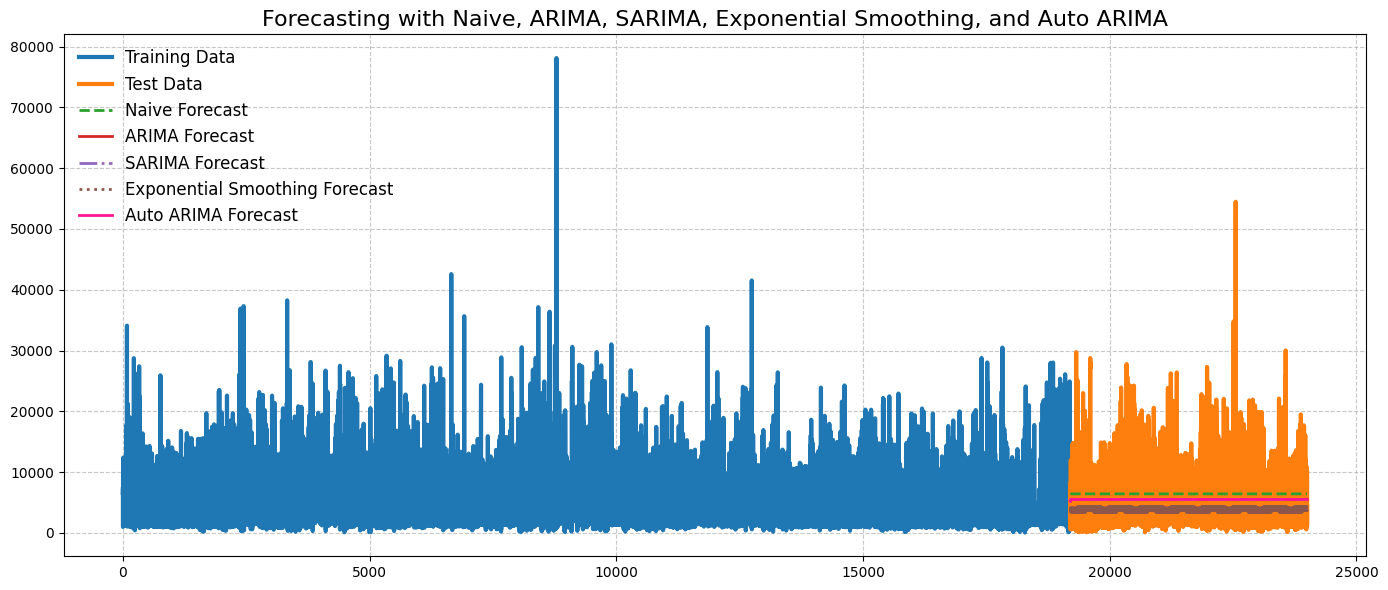

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Step 2: Train-Test Split
train_size = int(len(data) * 0.8)
train, test = data.iloc[:train_size], data.iloc[train_size:]
train_series = train.set_index('Quarter_Index')['Target']
test_series = test.set_index('Quarter_Index')['Target']

# Final visualization with Forecasting (Naive, ARIMA, SARIMA, Exponential Smoothing, Auto ARIMA)
fig, ax = plt.subplots(figsize=(14, 6))

# Plotting Training and Test Data
ax.plot(train_series.index, train_series, label='Training Data', color='#1f77b4', linewidth=3)
ax.plot(test_series.index, test_series, label='Test Data', color='#ff7f0e', linewidth=3)

# Plot Naive Model Forecast
naive_forecast_series = pd.Series(naive_forecast, index=test_series.index)
ax.plot(naive_forecast_series, label='Naive Forecast', color='#2ca02c', linestyle='--', linewidth=2)

# Plot ARIMA Model Forecast
arima_forecast_series = pd.Series(arima_forecast, index=test_series.index)
ax.plot(arima_forecast_series, label='ARIMA Forecast', color='#d62728', linestyle='-', linewidth=2)

# Plot SARIMA Model Forecast
sarima_forecast_series = pd.Series(sarima_forecast, index=test_series.index)
ax.plot(sarima_forecast_series, label='SARIMA Forecast', color='#9467bd', linestyle='-.', linewidth=2)

# Plot Exponential Smoothing Forecast
exp_forecast_series = pd.Series(exp_forecast, index=test_series.index)
ax.plot(exp_forecast_series, label='Exponential Smoothing Forecast', color='#8c564b', linestyle=':', linewidth=2)

# Plot Auto ARIMA Forecast
auto_arima_forecast_series = pd.Series(auto_arima_forecast, index=test_series.index)
ax.plot(auto_arima_forecast_series, label='Auto ARIMA Forecast', color='#ff1493', linestyle='-', linewidth=2)

# Adding labels, title, legend and grid
ax.set_title('Forecasting with Naive, ARIMA, SARIMA, Exponential Smoothing, and Auto ARIMA', fontsize=16)
ax.legend(loc='upper left', fontsize=12, frameon=False)
ax.grid(True, linestyle='--', alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()


In [72]:
# Determine Best Model
best_model_name = metrics_df.sort_values(by='RMSE').iloc[0]['Model']
print(f"Best Model: {best_model_name}")


Best Model: ARIMA


In [73]:
# Forecast Next Quarters Using Best Model
last_quarter = data['Quarter'].iloc[-1]  # Get the last quarter dynamically
future_quarters = generate_future_quarters(last_quarter, n_future=4)

if best_model_name == 'ARIMA':
    best_model_fit = arima_fit
elif best_model_name == 'SARIMA':
    best_model_fit = sarima_fit
elif best_model_name == 'Exponential Smoothing':
    best_model_fit = exp_fit
else:
    best_model_fit = None  # Naive doesn't have a fit, it's just the last value

if best_model_name != 'Naive':
    future_forecast = best_model_fit.forecast(steps=4)
else:
    future_forecast = [train_series[-1]] * 4  # Naive forecast

# Create a DataFrame for the forecasted sales
predicted_sales = pd.DataFrame({
    'Quarter': future_quarters,
    'Predicted_Sales': future_forecast
})
print(predicted_sales)


      Quarter  Predicted_Sales
19200  Q24001      5222.227293
19201  Q24002      5230.433623
19202  Q24003      5199.410955
19203  Q24004      5316.723170


c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Vrinda\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


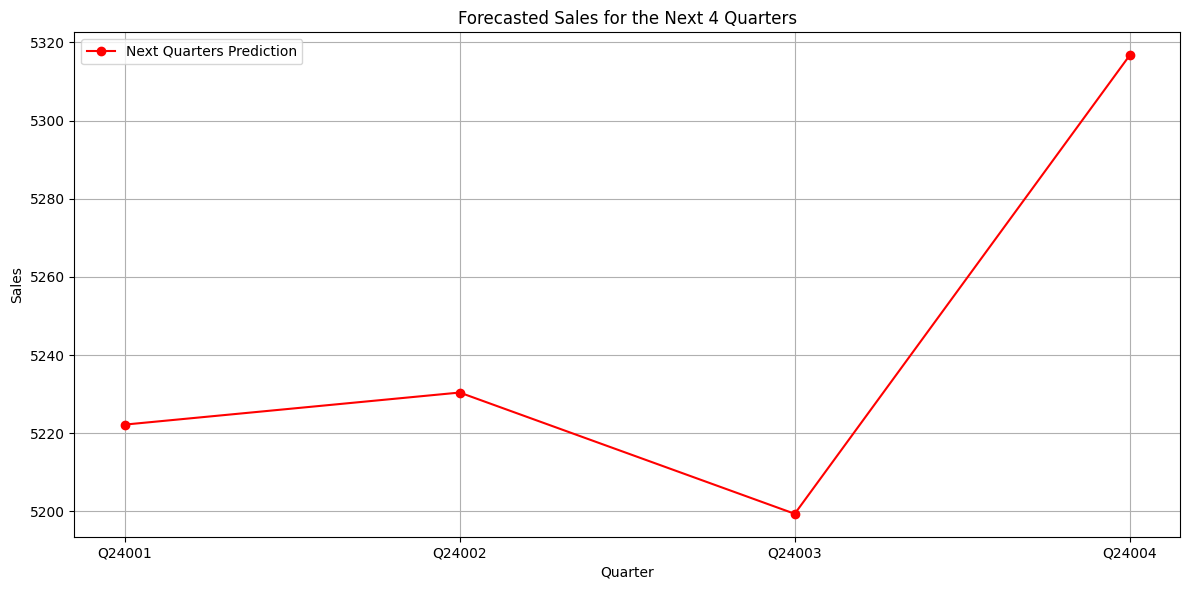

In [74]:
import matplotlib.pyplot as plt

# Forecast Next Quarters Using Best Model
last_quarter = data['Quarter'].iloc[-1]  # Get the last quarter dynamically
future_quarters = generate_future_quarters(last_quarter, n_future=4)

if best_model_name == 'ARIMA':
    best_model_fit = arima_fit
elif best_model_name == 'SARIMA':
    best_model_fit = sarima_fit
else:
    best_model_fit = exp_fit

# Forecast the future sales
future_forecast = best_model_fit.forecast(steps=4)

# Create a DataFrame for the forecasted sales
predicted_sales = pd.DataFrame({
    'Quarter': future_quarters,
    'Predicted_Sales': future_forecast
})

# Plot the forecasted sales for the next 4 quarters
plt.figure(figsize=(12, 6))
plt.plot(predicted_sales['Quarter'], predicted_sales['Predicted_Sales'], label='Next Quarters Prediction', marker='o', color='red')

# Add labels and title
plt.title('Forecasted Sales for the Next 4 Quarters')
plt.xlabel('Quarter')
plt.ylabel('Sales')

# Display the legend and grid
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()
